<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [66]:
# import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import numpy as np



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [67]:
df = pd.read_csv('data.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [68]:
categorical = list(df.dtypes[df.dtypes == object].keys())

print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [69]:
for column in categorical:
    print(f"\nWartości w {column}: \n{df[column].unique()}")


Wartości w workclass: 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Wartości w education: 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Wartości w marital_status: 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Wartości w occupation: 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Wartości w relationship: 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Wartości w race: 
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

W

Brakujące dane zostały zakodowane jako ' ?'

In [70]:
for column in categorical:
    df[column].replace(' ?', np.NaN, inplace=True)
    print(f"\nNowe wartości w {column}: \n{df[column].unique()}")


Nowe wartości w workclass: 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']

Nowe wartości w education: 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Nowe wartości w marital_status: 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Nowe wartości w occupation: 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' nan
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Nowe wartości w relationship: 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Nowe wartości w race: 
[' White' ' Black' ' Asian-Pac-Islander' ' Amer

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [72]:
X = df.drop(['income'], axis='columns')
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### Uzupełnienie danych

In [73]:
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)  

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


W kolumnach numerycznych nie ma wartości null, widać to z tabeli df.info() - liczba wartości non-null est równa liczbie wszytkich rekordów. W tym wypadku nie trzeba szukać niestandardowych oznaczeń wartości null jak np. ' ?', ponieważ jeśli taka wartość by wystąpiła to kolumna nie byłaby już typu numerycznego

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [74]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [75]:
# skalowanie 
from sklearn.preprocessing import RobustScaler

cols = X_train.columns
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=[cols])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=[cols])
X_train_scaled.head()



,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()
gnb2 = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Score dla danych nieprzeskalowanych: ", gnb.score(X_test, y_test))

# fit model for scaled data
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print("Score dla danych nieprzeskalowanych: ", gnb.score(X_test_scaled, y_test))

Score dla danych nieprzeskalowanych:  0.7974204115057836
Score dla danych nieprzeskalowanych:  0.8082710615211383


In [77]:
# Ponieważ 

### Macierze błędu 

In [78]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5999 1408]
 [ 465 1897]]
True Positives(TP) =  5999
True Negatives(TN) =  1897
False Positives(FP) =  1408
False Negatives(FN) =  465


### Wizualizacja wykresem

<AxesSubplot:>

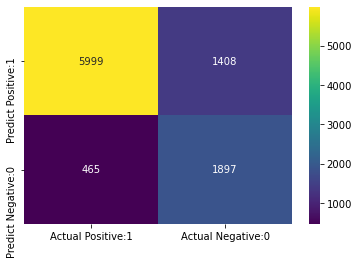

In [79]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

In [80]:
def do_stuff(df, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    encoder = ce.OneHotEncoder()
    X_train = encoder.fit_transform(X_train)
    X_test = encoder.transform(X_test)
    cols = X_train.columns
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=[cols])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=[cols])
    X_train_scaled.head()

    # fit the model
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print("Score dla danych nieprzeskalowanych: ", gnb.score(X_test, y_test))

    # fit model for scaled data
    gnb.fit(X_train_scaled, y_train)
    y_pred = gnb.predict(X_test_scaled)
    print("Score dla danych nieprzeskalowanych: ", gnb.score(X_test_scaled, y_test))

    cm = confusion_matrix(y_test, y_pred)

    print('Confusion matrix\n\n', cm)
    print('True Positives(TP) = ', cm[0,0])
    print('True Negatives(TN) = ', cm[1,1])
    print('False Positives(FP) = ', cm[0,1])
    print('False Negatives(FN) = ', cm[1,0])

    cm_matrix = pd.DataFrame(data=cm)

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

Score dla danych nieprzeskalowanych:  0.2610030706243603
Score dla danych nieprzeskalowanych:  0.45718184919822585
Confusion matrix

 [[   3    0    1   13   13]
 [   2   30    3   46   12]
 [  12    0   40  162   75]
 [   2    1    1   14    5]
 [  77    2  104 1060 1253]]
True Positives(TP) =  3
True Negatives(TN) =  30
False Positives(FP) =  0
False Negatives(FN) =  2


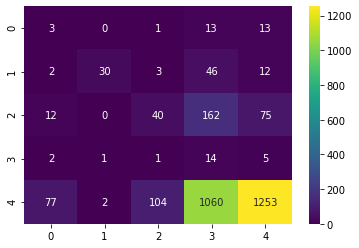

In [81]:
X = df2.drop(['race'], axis='columns')
y = df2['race']
do_stuff(df, X, y)

Score dla danych nieprzeskalowanych:  0.05868304332992153
Score dla danych nieprzeskalowanych:  0.019106107130672127
Confusion matrix

 [[  0   0   0 ...   0   0   0]
 [  0   1   0 ...   1   0   0]
 [  0   1   1 ...   0   0   0]
 ...
 [  8 717   1 ...  38   3  35]
 [  0   0   1 ...   0   2   0]
 [  0   0   0 ...   0   0   0]]
True Positives(TP) =  0
True Negatives(TN) =  1
False Positives(FP) =  0
False Negatives(FN) =  0


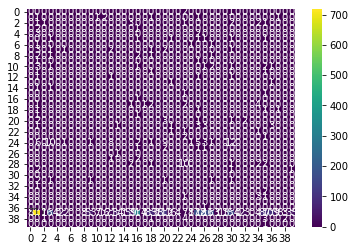

In [82]:
X = df2.drop(['native_country'], axis='columns')
y = df2['native_country']
do_stuff(df, X, y)

## Wnioski
Ponieważ w dwóch ostatnich zagadnieniach nie mamy do czynienia z klasyfikacją dwuklasową tylko wieloklasową, macierz pomyłek, je odpowiednio bardziej rozbudowana - do tego stopnia, że ostatnia jest w ogóle trudna do odczytania. Wraz ze wzrostem liczby klas ucierpiała również jakość dopasowania, co zapewne związane jest z próbą nauczenia bardziej skomplikowanego zagadnienia przy stałej, zbyt małej liczbie rekordów w zbiorze treningowym.

